In [141]:
# Importing required packages

import sys
import os.path
import time
import ast

import pandas as pd
import numpy as np
import seaborn as sns
import requests
import tweepy
import json

from IPython.display import Image

import matplotlib.pyplot as plt 
% matplotlib inline

# Gathering

#### The WeRateDogs Twitter archive
[`twitter_archive_enhanced.csv`](https://d17h27t6h515a5.cloudfront.net/topher/2017/August/59a4e958_twitter-archive-enhanced/twitter-archive-enhanced.csv)

In [2]:
twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')

#### The tweet image predictions
[`image_predictions.tsv`](https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv) via the [Requests](https://pypi.org/project/requests/) library

In [3]:
res = requests.get('https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv')

In [4]:
with open('image_preditions.tsv', mode='wb') as file:
    file.write(res.content)

In [5]:
image_predictions = pd.read_csv('image_preditions.tsv', sep='\t')

#### Each tweet's retweet count and favorite ("like") count at minimum
Using [Tweepy](http://www.tweepy.org/) to fetch json data and save it to `tweet_json.txt`

In [71]:
# Configure Tweepy

consumer_key = 'YOUR CONSUMER KEY'
consumer_secret = 'YOUR CONSUMER SECRET'
access_token = 'YOUR ACCESS TOKEN'
access_secret = 'YOUR ACCESS SECRET'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

In [72]:
def append_new_line(file_name, text_to_append):
    """
        Append given text as a new line at the end of file
        Code Snippet from https://thispointer.com/how-to-append-text-or-lines-to-a-file-in-python/
    """
    
    # Open the file in append & read mode ('a+')
    with open(file_name, "a+") as file_object:
        # Move read cursor to the start of file.
        file_object.seek(0)
        # If file is not empty then append '\n'
        data = file_object.read(100)
        if len(data) > 0:
            file_object.write("\n")
        # Append text at the end of file
        file_object.write(text_to_append)

In [73]:
tweets_ids = list(twitter_archive.tweet_id)

for tweet_id in tweets_ids:
    start = time.time()
    try:
        tweet = api.get_status(tweet_id, tweet_mode='extended')
    except:
        e = sys.exc_info()[0]
        print('Error\nTweet ID: {}\nError Message: {}'.format(tweet_id, e))
        
    if os.path.isfile('tweet_json.txt'):
        try:
            append_new_line('tweet_json.txt', str(tweet._json))
            end = time.time()
            print('Tweet {} of {} is finished in {:.2f} seconds'.format(tweets_ids.index(tweet_id)+1, len(tweets_ids), end-start))
        except:
            print('Error in appending tweet with ID: {}'.format(tweet_id))
    else:
        try:
            with open('tweet_json.txt', 'w') as file_object:
                file_object.write(str(tweet._json))
                end = time.time()
                print('Tweet {} of {} is finished in {:.2f} seconds'.format(tweets_ids.index(tweet_id)+1, len(tweets_ids), end-start))
        except:
            print('Error in creating tweet_json.txt')

In [8]:
tweet_json_list = []

In [9]:
with open('tweet_json.txt', mode='r') as file:
    lines = file.readlines()
    for line in lines:
        line = ast.literal_eval(line)
        tweet_data = json.dumps(line)
        tweet_data = json.loads(tweet_data)

        row = [tweet_data['id'], tweet_data['retweet_count'], tweet_data['favorite_count']]
        
        tweet_json_list.append(row)

In [10]:
tweet_json_columns = ['tweet_id', 'retweet_count', 'favorite_count']
tweet_json = pd.DataFrame(tweet_json_list, columns=tweet_json_columns)

# Assessing

### Visual Assessment

#### 1- Twitter Archive DataFrame

In [11]:
twitter_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


> #### Quality Issues
> - `in_reply_to_status_id`, `in_reply_to_user_id`, `retweeted_status_id`, `retweeted_status_user_id`,  `retweeted_status_timestamp` and `expanded_urls` columns contain missing values.
> - `source` column values are contained in html tag `<a>`.
> - `rating_numerator` contains some extreme values (e.g. `420` for tweet id `855862651834028034`, `666` for tweet id `855860136149123072` and `1776` for tweet id `749981277374128128`!).
> - `rating_denominator` contains some some values above 10 (e.g. `90` for tweet id `713900603437621249`, `130` for tweet id `684225744407494656` and `170` for tweet id `731156023742988288`!).
> - The `name` column contains some values that don't make sense like `"a"`, `"the"` and `"an"`.
> - Some tweets don't have any right value at all (None) in the four columns of dogs stages.

> #### Tidiness Issues
> - Four columns are present for one variable `dog stage` instead of one column.

#### 2- Image Predictions DataFrame

In [12]:
image_predictions

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


> #### Quality
> - Predictions `p` columns values shows inconsistency, some with uppder case first letter and presence of underscores between multiple words names.

> #### Tidiness
> - Columns contains 3 sets of predictions columns while only one set is needed.

#### 3- Twitter JSON DataFrame

In [13]:
tweet_json

,tweet_id,retweet_count,favorite_count
0,892420643555336193,7568,35777
1,892177421306343426,5607,30900
2,891815181378084864,3715,23246
3,891689557279858688,7754,39067
4,891327558926688256,8346,37313
5,891087950875897856,2803,18810
6,890971913173991426,1821,10925
7,890729181411237888,16934,60288
8,890609185150312448,3855,25870
9,890240255349198849,6587,29556


> #### Tidiness
> - Th dataframe is incomplete observation unit and should be mereged with the twitter archive datadrame.

### Programmatic Assessment

#### 1- Twitter Archive DataFrame

In [14]:
twitter_archive.sample(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
712,784431430411685888,NaN,NaN,2016-10-07 16:33:21 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Stormy. He's curly af. Already pupared...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/784431430...,12,10,Stormy,None,None,None,None
901,758474966123810816,NaN,NaN,2016-07-28 01:31:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Brandonald. He accidentally opened the...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758474966...,11,10,Brandonald,None,None,None,None
355,830956169170665475,NaN,NaN,2017-02-13 01:46:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Reggie. He hates puns. 12/10 ligh...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/830956169...,12,10,Reggie,None,None,None,None
2101,670691627984359425,NaN,NaN,2015-11-28 19:51:59 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Ester. He has a cocaine problem. This ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670691627...,8,10,Ester,None,None,None,None
1235,712668654853337088,NaN,NaN,2016-03-23 15:53:42 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Sunny and Roxy. They pull things ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/712668654...,10,10,Sunny,None,None,None,None
1493,692752401762250755,NaN,NaN,2016-01-28 16:53:37 +0000,"<a href=""http://twitter.com/download/iphone"" r...","""Hello yes could I get one pupper to go please...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/692752401...,13,10,None,None,None,pupper,None
1034,745057283344719872,NaN,NaN,2016-06-21 00:54:33 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Oliver. He's downright gorgeous as hel...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/745057283...,12,10,Oliver,None,None,None,None
1124,730211855403241472,NaN,NaN,2016-05-11 01:44:07 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Ziva. She doesn't know how her collar ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/730211855...,11,10,Ziva,None,None,None,None
1625,684830982659280897,NaN,NaN,2016-01-06 20:16:44 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",This little fella really hates stairs. Prefers...,NaN,NaN,NaN,https://vine.co/v/eEZXZI1rqxX,13,10,None,None,None,pupper,None
113,870726314365509632,8.707262e+17,16487760.0,2017-06-02 19:38:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@ComplicitOwl @ShopWeRateDogs &gt;10/10 is res...,NaN,NaN,NaN,NaN,10,10,None,None,None,None,None


In [15]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [16]:
twitter_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [17]:
twitter_archive[twitter_archive.rating_denominator == 170]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1120,731156023742988288,NaN,NaN,2016-05-13 16:15:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to this unbelievably well behaved sq...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/731156023...,204,170,this,None,None,None,None


In [18]:
twitter_archive[(twitter_archive.doggo == 'None') & (twitter_archive.floofer == 'None') & (twitter_archive.pupper == 'None') & (twitter_archive.puppo == 'None')].count()

tweet_id                      1976
in_reply_to_status_id           70
in_reply_to_user_id             70
timestamp                     1976
source                        1976
text                          1976
retweeted_status_id            145
retweeted_status_user_id       145
retweeted_status_timestamp     145
expanded_urls                 1923
rating_numerator              1976
rating_denominator            1976
name                          1976
doggo                         1976
floofer                       1976
pupper                        1976
puppo                         1976
dtype: int64

> #### Quality
> - Rows of retweets is identified by none NaN values of `in_reply_to_status_id` column, and should be dropped accordingly as per project requirements.
> (Note: Don't drop rows from `twitter_archive` dataframe until merging it with `tweet_json` dataframe and dropping the corresponding rows from `image_predictions` df)
> - `ids` columns are either of type `int` or of type `float`, should be converted to `string` type.
> - `timestamps` columns are of type `string`, should be converted to `datetime` type.
> - Tweet with id `731156023742988288` has a rating_numerator of `204` and rating denominator of `170`, when the tweet url is opened, the picture was containing 17 dogs, so the rating is collective and should be divided by 10.
> - `rating_denominator` column values should be corrected to reach equal `mean`, `min` and `max` values.
> - `expanded_urls` column contains missing values - when inspected the tweets of this rows, they weren't actual ratings.
> - 1976 rows have 'None' values in the four columns of dog stage and should be dropped to not affect the analysis result.


#### 2- Image Predictions DataFrame

In [19]:
image_predictions.sample(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
11,666071193221509120,https://pbs.twimg.com/media/CT5cN_3WEAAlOoZ.jpg,1,Gordon_setter,0.503672,True,Yorkshire_terrier,0.174201,True,Pekinese,0.109454,True
1196,740373189193256964,https://pbs.twimg.com/media/CkZVdJ6WYAAXZ5A.jpg,3,golden_retriever,0.807644,True,kuvasz,0.101286,True,Labrador_retriever,0.023785,True
969,706516534877929472,https://pbs.twimg.com/media/Cc4NCQiXEAEx2eJ.jpg,1,golden_retriever,0.772685,True,Labrador_retriever,0.071665,True,golfcart,0.020993,False
390,673363615379013632,https://pbs.twimg.com/media/CVhEoq4WcAE8pBm.jpg,1,ox,0.193431,False,warthog,0.123827,False,bison,0.111177,False
255,670755717859713024,https://pbs.twimg.com/media/CU8AwZ_UsAA-Lbu.jpg,1,keeshond,0.994065,True,Norwegian_elkhound,0.001827,True,cairn,0.001821,True
1838,837471256429613056,https://pbs.twimg.com/media/C59LpELWUAEUmYh.jpg,1,Norwegian_elkhound,0.976255,True,keeshond,0.013990,True,seat_belt,0.002111,False
1026,710833117892898816,https://pbs.twimg.com/media/Cd1i8qvUkAE-Jlr.jpg,1,Pembroke,0.803742,True,Cardigan,0.189712,True,German_shepherd,0.001746,True
547,677331501395156992,https://pbs.twimg.com/media/CWZdaGxXAAAjGjb.jpg,1,beagle,0.313464,True,boxer,0.218503,True,French_bulldog,0.106462,True
349,672482722825261057,https://pbs.twimg.com/media/CVUjd14W4AE8tvO.jpg,1,West_Highland_white_terrier,0.586173,True,borzoi,0.206620,True,Great_Pyrenees,0.060653,True
448,674690135443775488,https://pbs.twimg.com/media/CVz7FxXWUAAlTRP.jpg,1,tick,0.242538,False,nail,0.212589,False,screw,0.172838,False


In [20]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [21]:
image_predictions.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


> #### Quality
> - `tweet_id` column is of type `int`, should be `string` type to be consistent with the other 2 dataframes.
> - This dataframe contains `2075` rows, while `twitter_archive` df contains `2356` rows, the missing rows tweets_ids may be added from `twitter_archive` df with their values to be assigned as `Unknown`.

#### 3- Twitter JSON DataFrame

In [22]:
tweet_json.sample(10)

,tweet_id,retweet_count,favorite_count
709,785170936622350336,4854,12108
935,753398408988139520,1879,5709
2246,667878741721415682,110,371
2017,672160042234327040,338,835
34,885528943205470208,5740,33353
537,806629075125202948,34864,75262
1309,707059547140169728,659,2545
927,754856583969079297,2487,6856
1470,694001791655137281,1004,3344
822,770093767776997377,3039,0


In [23]:
tweet_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 3 columns):
tweet_id          2356 non-null int64
retweet_count     2356 non-null int64
favorite_count    2356 non-null int64
dtypes: int64(3)
memory usage: 55.3 KB


In [24]:
tweet_json.describe()

,tweet_id,retweet_count,favorite_count
count,2.356000e+03,2356.000000,2356.000000
mean,7.427734e+17,2684.395586,7577.802207
std,6.856970e+16,4510.739494,11684.305173
min,6.660209e+17,1.000000,0.000000
25%,6.783989e+17,543.750000,1316.750000
50%,7.196279e+17,1276.500000,3294.000000
75%,7.993373e+17,3114.250000,9324.000000
max,8.924206e+17,76464.000000,154206.000000


> #### Quality
> - `tweet_id` column is of type `int`, should be `string` type to be consistent with the other 2 dataframes.

# Cleaning

### Define


#### Twitter Archive Dataframe
> #### Quality 
> 1. ~~Drop retweets by dropping rows that contain values in `in_reply_to_status_id` in `twitter_archive` dataframe.~~
> 2. ~~Drop `in_reply_to_status_id`, `in_reply_to_user_id`, `retweeted_status_id`, `retweeted_status_user_id` and `retweeted_status_timestamp` columns as they contain missning values and will not affect the analysis process.~~
> 3. ~~Drop dogs stages columns.~~
> 4. ~~Normalize `rating_numerator` and `rating_denominator` columns to reach for rating denominator of 10 in all rows. (set all rating dendenominator that is less than 20 to 10, and divide all others that accept dividing by 10 to divide the rating numerator by ther result)~~
> 5. ~~Remove outliers in rating nominator (values over 15)~~
> 6. ~~Drop rows with no values in `expanded_urls` column.~~
> 7. ~~Correct columns datatypes .. `tweet_id` to string, `timestamp` to datetime, `rating_numerator` and `rating_denominator` to int.~~
> 8. ~~Extract the source value from the html tag in `source` column.~~
> 9. ~~In `name` column, set names with values 'a', 'an', 'my' or 'the' to 'None'~~

### Code

In [25]:
# Make copies of the original dataframes
twitter_archive_clean = twitter_archive.copy()
image_predictions_clean = image_predictions.copy()
tweet_json_clean = tweet_json.copy()

In [26]:
twitter_archive_clean.drop(twitter_archive_clean[twitter_archive_clean.in_reply_to_status_id.notna()].index, axis=0, inplace=True)

In [27]:
# Drop unnecessary columns in [twitter_archive_clean] df.
columns = ['in_reply_to_status_id',
           'in_reply_to_user_id',
           'retweeted_status_id',
           'retweeted_status_user_id',
           'retweeted_status_user_id',
           'retweeted_status_timestamp',
           'doggo',
           'floofer',
           'pupper',
           'puppo']
twitter_archive_clean.drop(columns, axis=1, inplace=True)

In [28]:
# If rating_denominator is > 10 and < 20 .. set to 10
twitter_archive_clean.rating_denominator[(twitter_archive_clean.rating_denominator < 20) & (twitter_archive_clean.rating_denominator > 10)] = 10

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [29]:
# If rating_denominator is < 10, then delete the row.
twitter_archive_clean.drop((twitter_archive_clean[twitter_archive_clean.rating_denominator < 10]).index, axis=0, inplace=True)

In [30]:
# If rating_denominator is dividable by 10, divide it and use the result divide the numerator by, then divide denominator by 10.
twitter_archive_clean.rating_numerator = twitter_archive_clean.rating_numerator / (twitter_archive_clean.rating_denominator / 10)
twitter_archive_clean.rating_denominator = 10

In [31]:
# Remove outliers in rating nominator (values over 15)
twitter_archive_clean.drop((twitter_archive_clean[twitter_archive_clean.rating_numerator > 15]).index, axis=0, inplace=True)

In [32]:
# Drop rows with no values in expanded_urls column
twitter_archive_clean.drop((twitter_archive_clean[twitter_archive_clean.expanded_urls.isnull()]).index, axis=0, inplace=True)

In [33]:
# Correcting columns datatypes
twitter_archive_clean.tweet_id = twitter_archive_clean.tweet_id.astype(str)
twitter_archive_clean.timestamp = pd.to_datetime(twitter_archive_clean.timestamp)
twitter_archive_clean.rating_numerator = twitter_archive_clean.rating_numerator.astype(int)

In [34]:
twitter_archive_clean.source = twitter_archive_clean.source.str.extract(r'(Twitter [A-Za-z ]*)')

In [35]:
twitter_archive_clean.name[(twitter_archive_clean.name == 'a') | (twitter_archive_clean.name == 'an') | (twitter_archive_clean.name == 'the') | (twitter_archive_clean.name == 'my')] = 'None'

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


### Test

In [36]:
twitter_archive_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name
0,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas
1,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly
2,891815181378084864,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie
3,891689557279858688,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla
4,891327558926688256,2017-07-29 16:00:24,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin


In [37]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2266 entries, 0 to 2355
Data columns (total 8 columns):
tweet_id              2266 non-null object
timestamp             2266 non-null datetime64[ns]
source                2165 non-null object
text                  2266 non-null object
expanded_urls         2266 non-null object
rating_numerator      2266 non-null int64
rating_denominator    2266 non-null int64
name                  2266 non-null object
dtypes: datetime64[ns](1), int64(2), object(5)
memory usage: 159.3+ KB


In [38]:
twitter_archive_clean.describe()

,rating_numerator,rating_denominator
count,2266.000000,2266.0
mean,10.688438,10.0
std,2.141366,0.0
min,0.000000,10.0
25%,10.000000,10.0
50%,11.000000,10.0
75%,12.000000,10.0
max,15.000000,10.0


In [39]:
twitter_archive_clean.rating_numerator[twitter_archive_clean.rating_numerator > 15].count()

0

In [40]:
twitter_archive_clean.expanded_urls[twitter_archive_clean.expanded_urls.isnull()].count()

0

In [41]:
twitter_archive_clean.source.value_counts()

Twitter for iPhone    2133
Twitter Web Client      32
Name: source, dtype: int64

In [42]:
twitter_archive_clean.name.value_counts()

None            732
Charlie          12
Lucy             11
Oliver           11
Cooper           11
Penny            10
Tucker           10
Lola             10
Winston           9
Bo                9
Sadie             8
Bailey            7
Daisy             7
Buddy             7
Toby              7
Milo              6
Oscar             6
Jack              6
Scout             6
Koda              6
Dave              6
Bella             6
Rusty             6
Leo               6
Jax               6
Stanley           6
George            5
Chester           5
Finn              5
Bentley           5
               ... 
Cheryl            1
such              1
Alexanderson      1
Gilbert           1
Herb              1
Goose             1
Brady             1
Cora              1
Maude             1
Beebop            1
Hubertson         1
Kuyu              1
Hector            1
Vinnie            1
Enchilada         1
Snoop             1
Buddah            1
Raphael           1
Combo             1


### Define

#### Image Predicitons Dataframe
> #### Tidiness
> 1. ~~Create new column with value of the predicition name with highest confidence.~~

> #### Quality
> 10. ~~Drop unnecessary columns.~~
> 11. ~~Rename `p` column to `dog_type` and change datatype of `tweet_id` column to be string and `dog_type` to be categorical.~~
> 12. ~~In `dog_type` column, replace underscores in values with space and capitalize all values to be consistent.~~

### Code

In [43]:
image_predictions_clean = image_predictions_clean.rename(columns={'p1_conf':'p_conf1', 'p2_conf':'p_conf2', 'p3_conf':'p_conf3', 'p1_dog':'p_dog1', 'p2_dog':'p_dog2', 'p3_dog':'p_dog3'})
image_predictions_clean = pd.wide_to_long(image_predictions_clean, ['p', 'p_conf', 'p_dog'], i='tweet_id', j='prediction')
image_predictions_clean.drop(image_predictions_clean[image_predictions_clean.p_dog == False].index, axis=0, inplace=True)
image_predictions_clean.reset_index(inplace=True)
image_predictions_clean.sort_values('p_conf', inplace=True)
image_predictions_clean.drop_duplicates(subset=['tweet_id'], keep='last', inplace=True)

In [44]:
# Make sure all predicitons are dogs
image_predictions_clean.p_dog.value_counts()

True    1751
Name: p_dog, dtype: int64

In [45]:
image_predictions_clean.drop(['p_conf', 'p_dog', 'img_num', 'prediction'], axis=1, inplace=True)

In [46]:
image_predictions_clean.rename(columns={'p': 'dog_type'}, inplace=True)

In [47]:
image_predictions_clean.tweet_id = image_predictions_clean.tweet_id.astype(str)
image_predictions_clean.dog_type = image_predictions_clean.dog_type.astype('category')

In [48]:
image_predictions_clean.dog_type = image_predictions_clean.dog_type.str.replace('_', ' ').str.title()

### Test

In [49]:
image_predictions_clean.head()

,tweet_id,jpg_url,dog_type
2460,752519690950500352,https://pbs.twimg.com/media/CnF8qVDWYAAh0g1.jpg,Labrador Retriever
2408,745433870967832576,https://pbs.twimg.com/media/ClhQJUUWAAEVpBX.jpg,Basset
2795,818536468981415936,https://pbs.twimg.com/media/C1wGkYoVQAAuC_O.jpg,Welsh Springer Spaniel
2573,776088319444877312,https://pbs.twimg.com/media/CsU4NKkW8AUI5eG.jpg,Pug
1604,667550904950915073,https://pbs.twimg.com/media/CUOb_gUUkAACXdS.jpg,Vizsla


In [50]:
image_predictions_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1751 entries, 2460 to 103
Data columns (total 3 columns):
tweet_id    1751 non-null object
jpg_url     1751 non-null object
dog_type    1751 non-null object
dtypes: object(3)
memory usage: 54.7+ KB


In [51]:
image_predictions_clean.describe()

,tweet_id,jpg_url,dog_type
count,1751,1751,1751
unique,1751,1691,113
top,805932879469572096,https://pbs.twimg.com/media/CsGnz64WYAEIDHJ.jpg,Golden Retriever
freq,1,2,173


### Define

#### Tweet JSON Dataframe
> #### Quality
> 13. ~~Change datatype of `tweet_id` to be string.~~

#### All Dataframes
> #### Tidiness
> *'To create a complete observational unit'*
> 2. ~~Create new dataframe `we_rate_dogs_master` through inner joining `twitter_archive_clean` with `image_predictions_clean`.~~
> 3. ~~Update `we_rate_dogs_master` through inner joining `tweet_json_clean` with it.~~

### Code

In [52]:
tweet_json_clean.tweet_id = tweet_json_clean.tweet_id.astype(str)

In [53]:
we_rate_dogs_master = pd.merge(left=twitter_archive_clean, right=image_predictions_clean, left_on='tweet_id', right_on='tweet_id')

In [54]:
we_rate_dogs_master = pd.merge(left=we_rate_dogs_master, right=tweet_json_clean, left_on='tweet_id', right_on='tweet_id')

### Test

In [55]:
tweet_json_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 3 columns):
tweet_id          2356 non-null object
retweet_count     2356 non-null int64
favorite_count    2356 non-null int64
dtypes: int64(2), object(1)
memory usage: 55.3+ KB


In [56]:
we_rate_dogs_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1732 entries, 0 to 1731
Data columns (total 12 columns):
tweet_id              1732 non-null object
timestamp             1732 non-null datetime64[ns]
source                1723 non-null object
text                  1732 non-null object
expanded_urls         1732 non-null object
rating_numerator      1732 non-null int64
rating_denominator    1732 non-null int64
name                  1732 non-null object
jpg_url               1732 non-null object
dog_type              1732 non-null object
retweet_count         1732 non-null int64
favorite_count        1732 non-null int64
dtypes: datetime64[ns](1), int64(4), object(7)
memory usage: 175.9+ KB


# Re-Assessment

**Re-assessing `we_rate_dogs_master`**

In [57]:
we_rate_dogs_master.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,jpg_url,dog_type,retweet_count,favorite_count
0,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,Chihuahua,5607,30900
1,891815181378084864,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,Chihuahua,3715,23246
2,891689557279858688,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,Labrador Retriever,7754,39067
3,891327558926688256,2017-07-29 16:00:24,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,Basset,8346,37313
4,891087950875897856,2017-07-29 00:08:17,Twitter for iPhone,Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13,10,None,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,Chesapeake Bay Retriever,2803,18810


In [58]:
we_rate_dogs_master.tail()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,jpg_url,dog_type,retweet_count,favorite_count
1727,666049248165822465,2015-11-16 00:24:50,Twitter for iPhone,Here we have a 1949 1st generation vulpix. Enj...,https://twitter.com/dog_rates/status/666049248...,5,10,None,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,Miniature Pinscher,40,96
1728,666044226329800704,2015-11-16 00:04:52,Twitter for iPhone,This is a purebred Piers Morgan. Loves to Netf...,https://twitter.com/dog_rates/status/666044226...,6,10,None,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,Rhodesian Ridgeback,129,266
1729,666033412701032449,2015-11-15 23:21:54,Twitter for iPhone,Here is a very happy pup. Big fan of well-main...,https://twitter.com/dog_rates/status/666033412...,9,10,None,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,German Shepherd,41,111
1730,666029285002620928,2015-11-15 23:05:30,Twitter for iPhone,This is a western brown Mitsubishi terrier. Up...,https://twitter.com/dog_rates/status/666029285...,7,10,None,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,Redbone,42,120
1731,666020888022790149,2015-11-15 22:32:08,Twitter for iPhone,Here we have a Japanese Irish Setter. Lost eye...,https://twitter.com/dog_rates/status/666020888...,8,10,None,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,Welsh Springer Spaniel,458,2384


In [59]:
we_rate_dogs_master.sample(20)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,jpg_url,dog_type,retweet_count,favorite_count
1065,697242256848379904,2016-02-10 02:14:42,Twitter for iPhone,This is Oakley. He has a massive tumor growing...,https://twitter.com/dog_rates/status/697242256...,10,10,Oakley,https://pbs.twimg.com/media/Ca0aIR9WcAAHiPy.jpg,Eskimo Dog,656,2476
284,825026590719483904,2017-01-27 17:04:02,Twitter for iPhone,Say hello to Pablo. He's one gorgeous puppo. A...,https://www.gofundme.com/my-puppys-double-cata...,12,10,Pablo,https://pbs.twimg.com/media/C3MVTeHWcAAGNfx.jpg,Eskimo Dog,1244,6295
1660,667524857454854144,2015-11-20 02:08:22,Twitter Web Client,Another topnotch dog. His name is Big Jumpy Ra...,https://twitter.com/dog_rates/status/667524857...,12,10,None,https://pbs.twimg.com/media/CUOGUfJW4AA_eni.jpg,Chesapeake Bay Retriever,1050,1604
799,735256018284875776,2016-05-24 23:47:49,Twitter for iPhone,This is Kellogg. He accidentally opened the fr...,https://twitter.com/dog_rates/status/735256018...,8,10,Kellogg,https://pbs.twimg.com/media/CjQnclkVEAA4pnK.jpg,Staffordshire Bullterrier,862,3268
1016,701545186879471618,2016-02-21 23:13:01,Twitter for iPhone,Meet Millie. She's practicing her dive form fo...,https://twitter.com/dog_rates/status/701545186...,10,10,Millie,https://pbs.twimg.com/media/CbxjnyOWAAAWLUH.jpg,Border Collie,599,2621
357,813157409116065792,2016-12-25 23:00:08,Twitter for iPhone,This is Layla. It is her first Christmas. She ...,https://twitter.com/dog_rates/status/813157409...,12,10,Layla,https://pbs.twimg.com/media/C0jqVVOXUAAGJ0G.jpg,Pembroke,2224,7824
1500,671536543010570240,2015-12-01 03:49:23,Twitter for iPhone,This is Reginald. He's pondering what life wou...,https://twitter.com/dog_rates/status/671536543...,9,10,Reginald,https://pbs.twimg.com/media/CVHG6_AWwAEJf_u.jpg,Pug,384,1111
24,886983233522544640,2017-07-17 16:17:36,Twitter for iPhone,This is Maya. She's very shy. Rarely leaves he...,https://twitter.com/dog_rates/status/886983233...,13,10,Maya,https://pbs.twimg.com/media/DE8yicJW0AAAvBJ.jpg,Chihuahua,6875,32349
1685,667090893657276420,2015-11-18 21:23:57,Twitter for iPhone,This is Clybe. He is an Anemone Valdez. One ea...,https://twitter.com/dog_rates/status/667090893...,7,10,Clybe,https://pbs.twimg.com/media/CUH7oLuUsAELWib.jpg,Chihuahua,116,315
1570,669993076832759809,2015-11-26 21:36:12,Twitter for iPhone,This is Zoey. Her dreams of becoming a hippo b...,https://twitter.com/dog_rates/status/669993076...,9,10,Zoey,https://pbs.twimg.com/media/CUxLJO8U8AAu6Zu.jpg,Toy Poodle,78,305


In [60]:
we_rate_dogs_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1732 entries, 0 to 1731
Data columns (total 12 columns):
tweet_id              1732 non-null object
timestamp             1732 non-null datetime64[ns]
source                1723 non-null object
text                  1732 non-null object
expanded_urls         1732 non-null object
rating_numerator      1732 non-null int64
rating_denominator    1732 non-null int64
name                  1732 non-null object
jpg_url               1732 non-null object
dog_type              1732 non-null object
retweet_count         1732 non-null int64
favorite_count        1732 non-null int64
dtypes: datetime64[ns](1), int64(4), object(7)
memory usage: 175.9+ KB


In [61]:
we_rate_dogs_master.describe()

,rating_numerator,rating_denominator,retweet_count,favorite_count
count,1732.000000,1732.0,1732.000000,1732.000000
mean,10.853349,10.0,2630.324480,8374.015012
std,1.779716,0.0,4608.842437,12520.068275
min,0.000000,10.0,11.000000,0.000000
25%,10.000000,10.0,580.500000,1715.250000
50%,11.000000,10.0,1310.000000,3778.500000
75%,12.000000,10.0,3014.250000,10434.500000
max,14.000000,10.0,76464.000000,154206.000000


#### Quality
> - Datatype of `dog_type` column is string, it would be better if it's changed to be categorical.

### Define

#### Quality
> 14. ~~Change datatype of `dog_type` column to be categorical.~~

### Code

In [62]:
we_rate_dogs_master.dog_type = we_rate_dogs_master.dog_type.astype('category')

In [63]:
we_rate_dogs_master['daytime'] = we_rate_dogs_master.timestamp

### Test

In [64]:
we_rate_dogs_master.dog_type.dtype

CategoricalDtype(categories=['Afghan Hound', 'Airedale', 'American Staffordshire Terrier',
                  'Appenzeller', 'Australian Terrier', 'Basenji', 'Basset',
                  'Beagle', 'Bedlington Terrier', 'Bernese Mountain Dog',
                  ...
                  'Toy Poodle', 'Toy Terrier', 'Vizsla', 'Walker Hound',
                  'Weimaraner', 'Welsh Springer Spaniel',
                  'West Highland White Terrier', 'Whippet',
                  'Wire-Haired Fox Terrier', 'Yorkshire Terrier'],
                 ordered=False)

# Storing

In [84]:
we_rate_dogs_master.to_csv('twitter_archive_master.csv')

# Analysis

### Questions

- What are the top 20 dog types in retweet counts and favourites counts?
- What are the top rated 20 dog types?
- Is there a relationship between ratings and retweet counts?
- Is there a relationship between ratings and favourites counts?
- Is there common names for dogs, if there is, what is it and what is its dog type?
- What is the most liked and least liked dog types?
- What dog types is retweeted most and least?
- Who is the most liked dogs in the whole dataset?

**What are the top 20 dog types in retweet counts and favourites counts?**

In [65]:
dog_types_sum = we_rate_dogs_master.groupby('dog_type').sum()

dog_types_retweets = dog_types_sum.sort_values('retweet_count', ascending=False)
dog_types_favourites = dog_types_sum.sort_values('favorite_count', ascending=False)

Text(0.5,0,'Dogs Breeds')

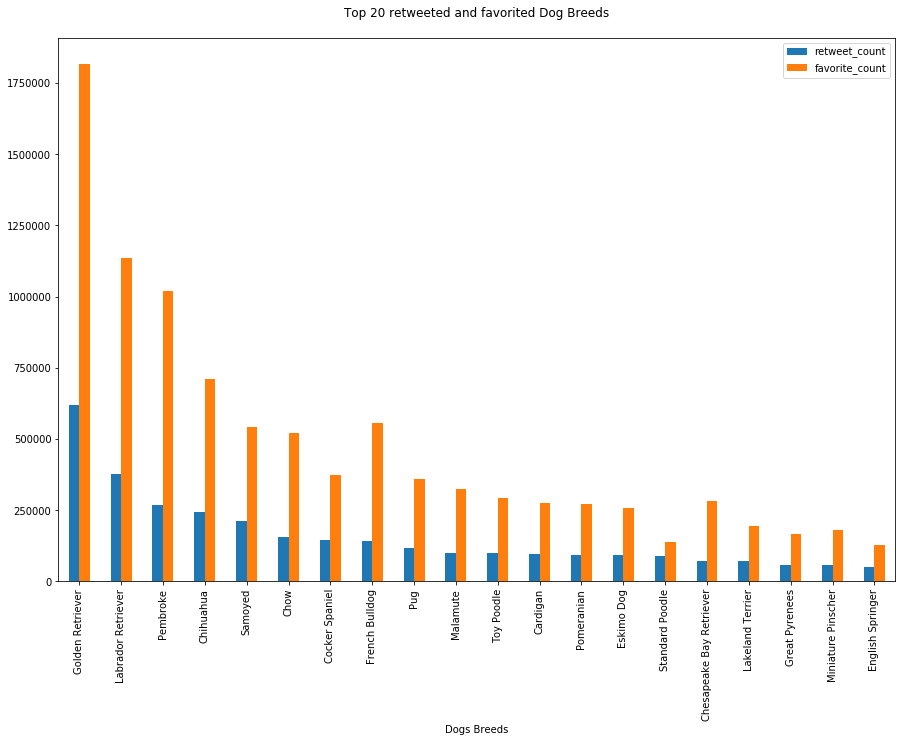

In [94]:
plt_dog_types_retweets = dog_types_retweets.head(20).plot(kind='bar', y=['retweet_count', 'favorite_count'],title='Top 20 retweeted and favorited Dog Breeds\n', figsize=(15, 10));
plt_dog_types_retweets.set_xlabel('Dogs Breeds')

**What are the top rated 20 dog types?**

In [67]:
top_rated = we_rate_dogs_master[we_rate_dogs_master.rating_numerator == 14].groupby('dog_type').count()
top_rated = top_rated.rating_numerator[top_rated.rating_numerator > 0].sort_values(ascending=False)

In [117]:
top_rated.count

<bound method Series.count of dog_type
Pembroke                   4
French Bulldog             3
Standard Poodle            2
Irish Setter               2
Golden Retriever           2
Samoyed                    1
Rottweiler                 1
Pomeranian                 1
Labrador Retriever         1
Gordon Setter              1
Eskimo Dog                 1
Chihuahua                  1
Bloodhound                 1
Black-And-Tan Coonhound    1
Bedlington Terrier         1
Name: rating_numerator, dtype: int64>

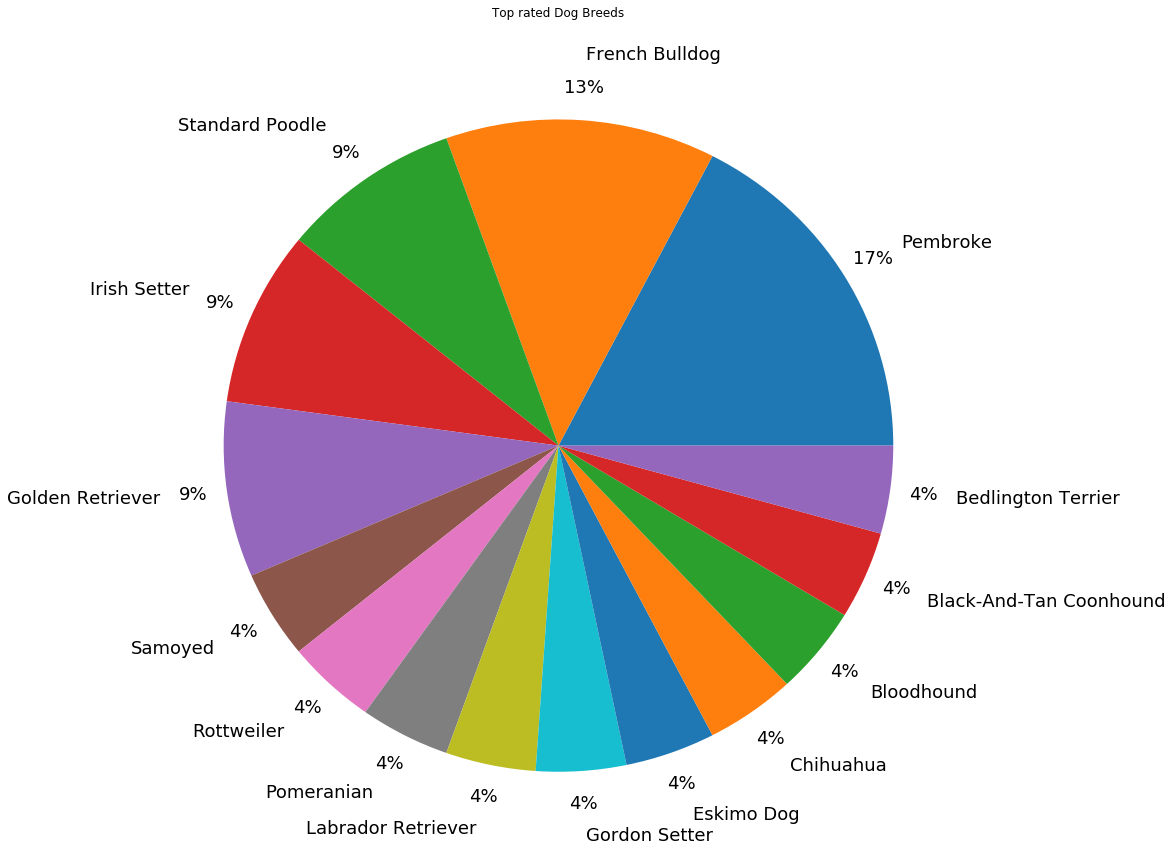

In [115]:
top_rated_plot = top_rated.plot(kind='pie',autopct='%1.0f%%', pctdistance=1.1, labeldistance=1.2, title='Top rated Dog Breeds\n', figsize=(15, 15), fontsize=18);
top_rated_plot.set_ylabel('');
top_rated_plot.set_xlabel('');

**Is there a relationship between favourites counts and retweet counts?**

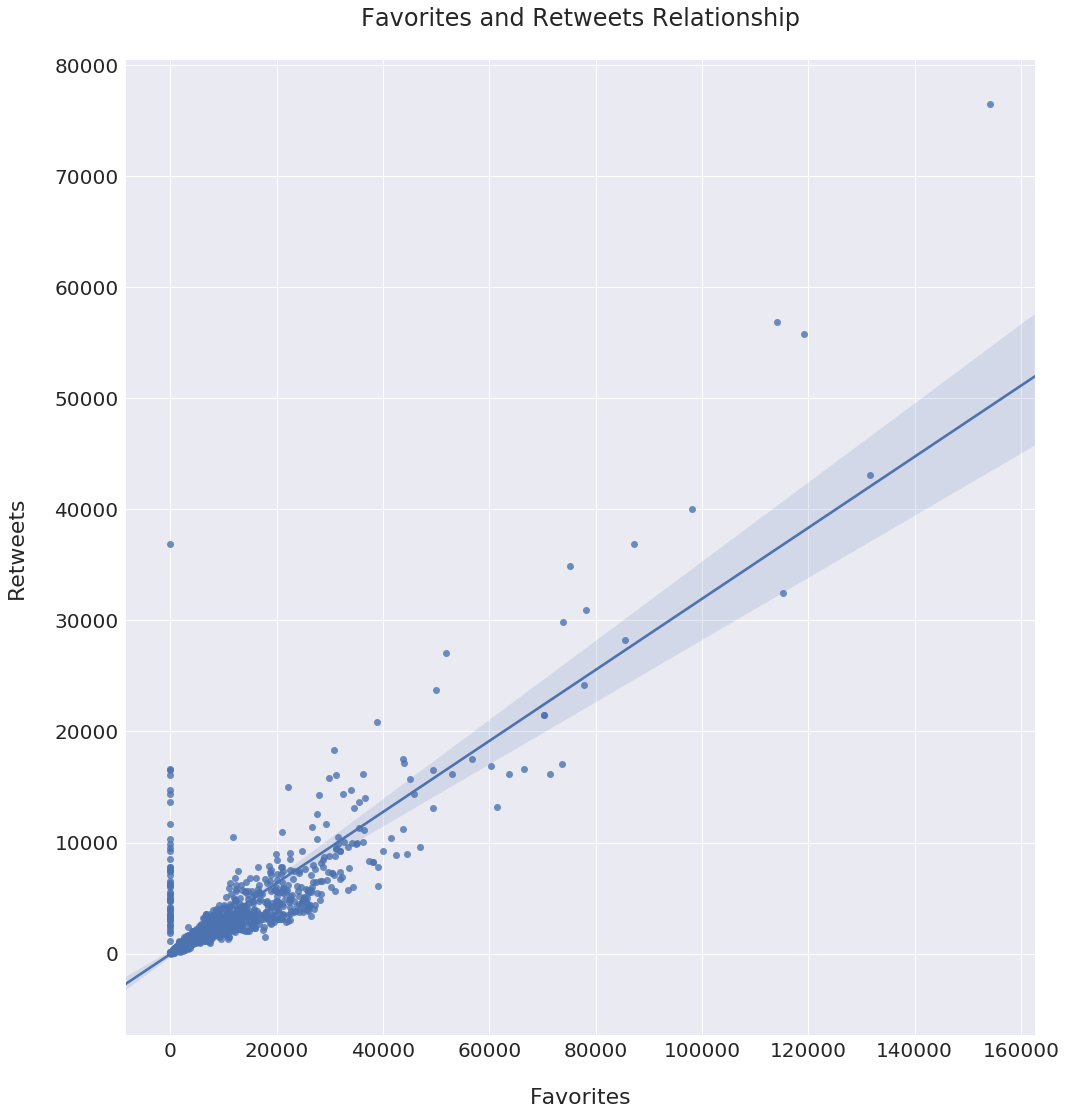

In [163]:
ratings_retweets_plot = sns.lmplot(x='favorite_count',y='retweet_count',data=we_rate_dogs_master,fit_reg=True, size=15);
ratings_retweets_plot.set(xlabel='\nFavorites', ylabel='Retweets\n', title='Favorites and Retweets Relationship\n');
sns.set(font_scale=1)

**Is there common names for dogs, if there is, what is it and what is its dog type?**

In [71]:
common_names = we_rate_dogs_master.name.value_counts()

In [72]:
common_names[1:3]

Cooper    10
Tucker    10
Name: name, dtype: int64

Text(0,0.5,'Count')

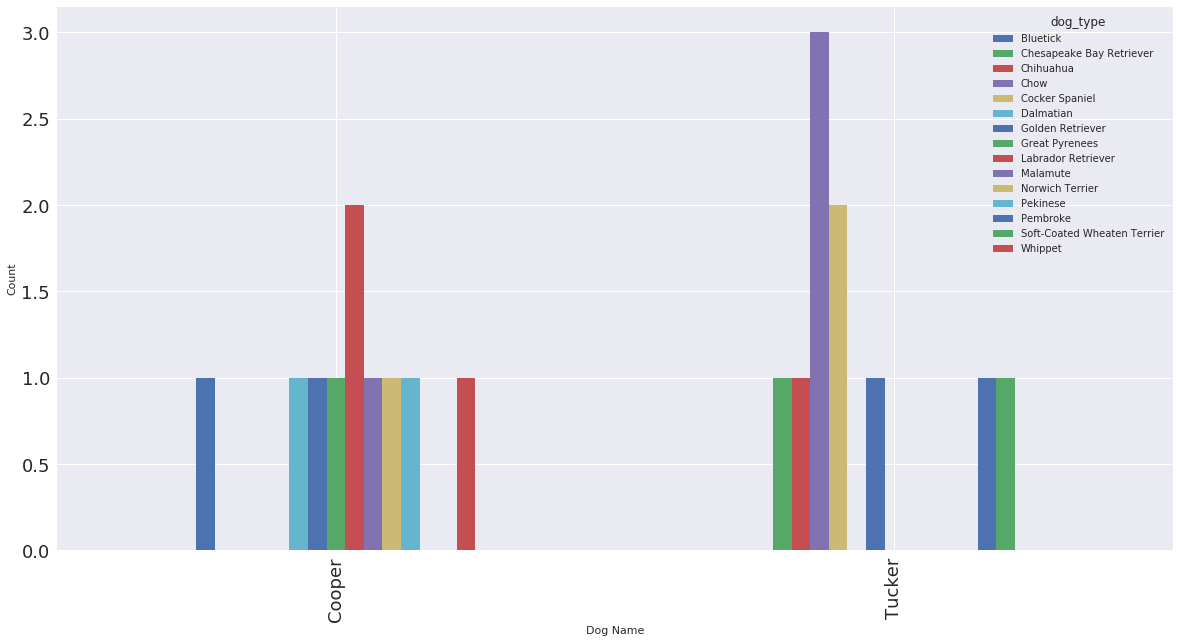

In [170]:
top_names = we_rate_dogs_master[(we_rate_dogs_master.name == 'Tucker') | (we_rate_dogs_master.name == 'Cooper')]
common_names_plot = top_names.groupby('name').dog_type.value_counts().unstack().plot(kind='bar', figsize=(20, 10), fontsize=18);
common_names_plot.set_xlabel('Dog Name')
common_names_plot.set_ylabel('Count')

In [173]:
top_names.groupby('name').dog_type.value_counts()

name    dog_type                   
Cooper  Labrador Retriever             2
        Bluetick                       1
        Dalmatian                      1
        Golden Retriever               1
        Great Pyrenees                 1
        Malamute                       1
        Norwich Terrier                1
        Pekinese                       1
        Whippet                        1
Tucker  Chow                           3
        Cocker Spaniel                 2
        Chesapeake Bay Retriever       1
        Chihuahua                      1
        Golden Retriever               1
        Pembroke                       1
        Soft-Coated Wheaten Terrier    1
Name: dog_type, dtype: int64

**What is the most liked and least liked dog types?**

In [76]:
dog_types_desc = we_rate_dogs_master.groupby('dog_type').sum().sort_values(by='favorite_count', ascending=False)

In [174]:
dog_types_desc

,rating_numerator,rating_denominator,retweet_count,favorite_count
dog_type,,,,
Golden Retriever,2002,1730,619692,1817593
Labrador Retriever,1230,1100,377929,1134082
Pembroke,1099,960,268537,1017901
Chihuahua,970,920,245121,708959
Samoyed,542,460,213177,540769
Chow,630,550,157321,521418
Cocker Spaniel,377,330,147122,374356
French Bulldog,335,300,142065,556756
Pug,683,660,116776,359344


In [77]:
# Most liked
dog_types_desc.index[0]

'Golden Retriever'

In [78]:
# Least Liked
dog_types_desc.index[len(dog_types_desc)-1]

'Japanese Spaniel'

**What dog types is retweeted most and least?**

In [79]:
dog_types_desc = we_rate_dogs_master.groupby('dog_type').sum().sort_values(by='retweet_count', ascending=False)

In [175]:
dog_types_desc

,rating_numerator,rating_denominator,retweet_count,favorite_count
dog_type,,,,
Golden Retriever,2002,1730,619692,1817593
Labrador Retriever,1230,1100,377929,1134082
Pembroke,1099,960,268537,1017901
Chihuahua,970,920,245121,708959
Samoyed,542,460,213177,540769
Chow,630,550,157321,521418
Cocker Spaniel,377,330,147122,374356
French Bulldog,335,300,142065,556756
Pug,683,660,116776,359344


In [80]:
# Most retweeted
dog_types_desc.index[0]

'Golden Retriever'

In [81]:
# Least retweeted
dog_types_desc.index[len(dog_types_desc)-1]

'Japanese Spaniel'

**Who is the most liked dog in the whole dataset?**

In [82]:
# The highest favourited dog picture, retweets count, favourites count and type at all!
top_dog = we_rate_dogs_master.sort_values(by='favorite_count', ascending=False)
top_dog_retweets_count = top_dog.iloc[0]['retweet_count']
top_dog_favourites_count = top_dog.iloc[0]['favorite_count']
top_dog_type = top_dog.iloc[0]['dog_type']

img_raw = requests.get(top_dog.iloc[0]['jpg_url']).content

with open('best_dog.jpg', 'wb') as image:
    image.write(img_raw)

The top dog is of type "Labrador Retriever" with total retweets of 76464 and total likes of 154206.


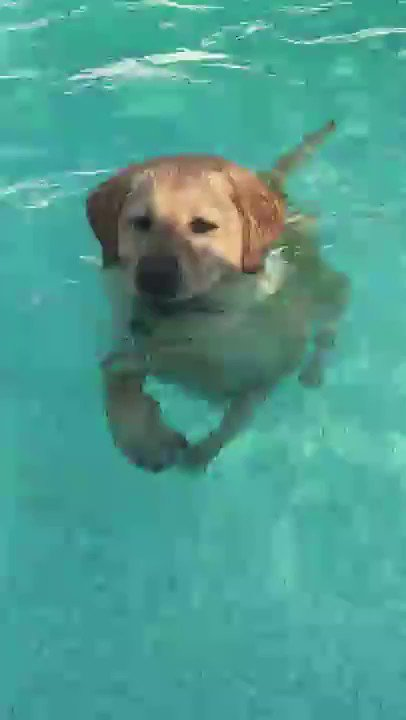

In [83]:
print('The top dog is of type "{}" with total retweets of {} and total likes of {}.'.format(top_dog_type, top_dog_retweets_count, top_dog_favourites_count))
Image(filename='best_dog.jpg') 

In [178]:
top_dog.iloc[0]['expanded_urls']

'https://twitter.com/dog_rates/status/744234799360020481/video/1'